In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
df = pd.read_excel(f"{data_dir}/SCE-Public-LM-Quarterly-Microdata.xlsx", sheet_name="Data")

In [367]:
select = ["userid", "year", "education", "survey_weight", "l1a_lfs_rc", "l5_ne_looked_for_work", 
          "l6_emp_looked_for_work", "js7_search_hours_spent"]

In [368]:
data = df[select]

In [36]:
# Assuming df is your dataframe
data = data.rename(columns={
    'l1a_lfs_rc': 'emp_stat', 
    'l5_ne_looked_for_work': 'unemp_search', 
    'l6_emp_looked_for_work': 'emp_search', 
    'js7_search_hours_spent': 'hours_search'
})


In [37]:
data = data[data['year'] > 2015]
data = data.dropna(subset=["emp_stat"])
data = data[(data['hours_search'].isna()) | (data['hours_search'] <= 168)]


In [38]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search
0,75000155,2021,0.885758,1.0,NaN,NaN,NaN
1,70125586,2021,0.634458,1.0,NaN,3.0,NaN
2,75001148,2021,0.814109,1.0,NaN,3.0,NaN
3,75000602,2021,2.775664,3.0,0.0,NaN,NaN
4,70122015,2021,1.097391,2.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1.0,NaN,3.0,NaN
6649,70069256,2016,0.623000,2.0,NaN,3.0,NaN
6650,70072511,2016,0.840000,1.0,NaN,3.0,NaN
6651,70074226,2016,0.621000,1.0,NaN,3.0,NaN


In [48]:
# Update employment Status 
data['emp_stat'] = np.where(data['emp_stat'].isin([1, 2]), 1, 0)

# Employments Stock
data['E'] = data.groupby('year')['survey_weight'].transform(lambda x: x[data['emp_stat'] == 1].sum())

# Unemployed Stock 
data['U'] = data.groupby('year')['survey_weight'].transform(lambda x: x[data['emp_stat'] == 0].sum()) 

# Labor Force 
data['L'] = data['E'] + data['U']

In [49]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
1,70125586,2021,0.634458,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
2,75001148,2021,0.814109,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
4,70122015,2021,1.097391,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6649,70069256,2016,0.623000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6650,70072511,2016,0.840000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6651,70074226,2016,0.621000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473


In [50]:
######################################################
# Extensive Margin Search 
######################################################

# Employed Workers searching for a job 
data['emp_search'] = np.where(data['emp_search'].isin([1, 2]), 1, np.where(data['emp_search'] == 3, 0, np.nan))
data['tot_emp_search'] = data.groupby('year')['survey_weight'].transform(lambda x: x[data['emp_search'] == 1].sum())

# Unemployed workers search for a job 
data['unemp_search'] = np.where(data['unemp_search'].isin([1, 2]), 1, np.where(data['unemp_search'] == 3, 0, np.nan))
data['tot_unemp_search'] = data.groupby('year')['survey_weight'].transform(lambda x: x[data['unemp_search'] == 1].sum())

data['emp_search_share'] = data['tot_emp_search'] / (data['E'] + data['U'])

data['unemp_search_share'] = data['tot_unemp_search'] / (data['E'] + data['U'])

data['tot_search_share'] = data['emp_search_share'] + data['unemp_search_share']


In [51]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
1,70125586,2021,0.634458,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
2,75001148,2021,0.814109,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
4,70122015,2021,1.097391,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6649,70069256,2016,0.623000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6650,70072511,2016,0.840000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473
6651,70074226,2016,0.621000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473


In [52]:
data[data['emp_stat'] == 0].head(30)

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
5,70123649,2021,0.536923,0,1.0,NaN,6.0,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
6,70123410,2021,0.689896,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
7,70124682,2021,0.628852,0,1.0,NaN,14.0,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
13,70121623,2021,3.435795,0,1.0,NaN,2.0,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
15,70121250,2021,3.940344,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
18,75001945,2021,1.018967,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
19,70122110,2021,0.897758,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
22,70120739,2021,4.372760,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695
27,75000625,2021,2.252427,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695


In [53]:
emp_workers = data[data['emp_search'] == 1]
unemp_workers = data[data['unemp_search'] == 1]

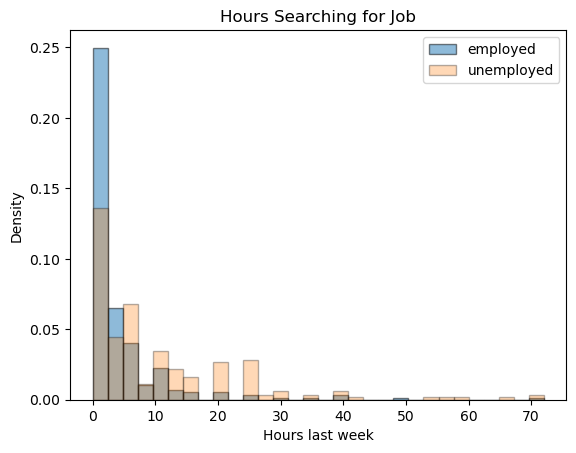

In [54]:
# Create a histogram for 'variable_name'
plt.hist(emp_workers['hours_search'], bins=30, alpha=0.5, label='employed', edgecolor='black', density=True)
plt.hist(unemp_workers['hours_search'], bins=30, alpha=0.3, label='unemployed', edgecolor='black', density=True)

# Add titles and labels
plt.title('Hours Searching for Job')
plt.xlabel('Hours last week')
plt.ylabel('Density')
plt.legend()
# Show the plot
plt.show()

In [55]:


################################################################
# Intensive Margin Search 
################################################################

# Search Hours supplied by employed workers 

data['emp_search_hours'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().sum()
)

# Search Hours supplied by unemployed workers 
data['unemp_search_hours'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().sum()
)

# Total hours of search 
data['tot_search_hours'] = data['emp_search_hours'] + data['unemp_search_hours'] 

# Share of hours supplied by employed workers 
data['emp_share_search_hours'] = data['emp_search_hours']  / data['tot_search_hours'] 

# Share of hours supplied by unemployed workers 
data['unemp_share_search_hours'] = data['unemp_search_hours'] / data['tot_search_hours'] 

# Average/st deviation hours of search conditional on employed and searching 

data['avg_search_hours_emp'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().mean()
)

data['std_search_hours_emp'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().std()
)

# Average hours of search conditional on unemployed and searching 
data['avg_search_hours_unemp'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().mean()
)

data['std_search_hours_unemp'] = data.groupby('year')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().std()
)


In [74]:
select = ['year', 'E', 'U', 'L', 'tot_emp_search', 'tot_unemp_search',  'tot_search_share', 'emp_search_share', 'unemp_search_share', 'tot_search_hours', 
          'emp_share_search_hours', 'unemp_share_search_hours', 'avg_search_hours_emp', 'std_search_hours_emp', 
          'avg_search_hours_unemp', 'std_search_hours_unemp']

agg_data = data[select]

In [75]:
agg_data = agg_data.drop_duplicates().reset_index(drop=True)

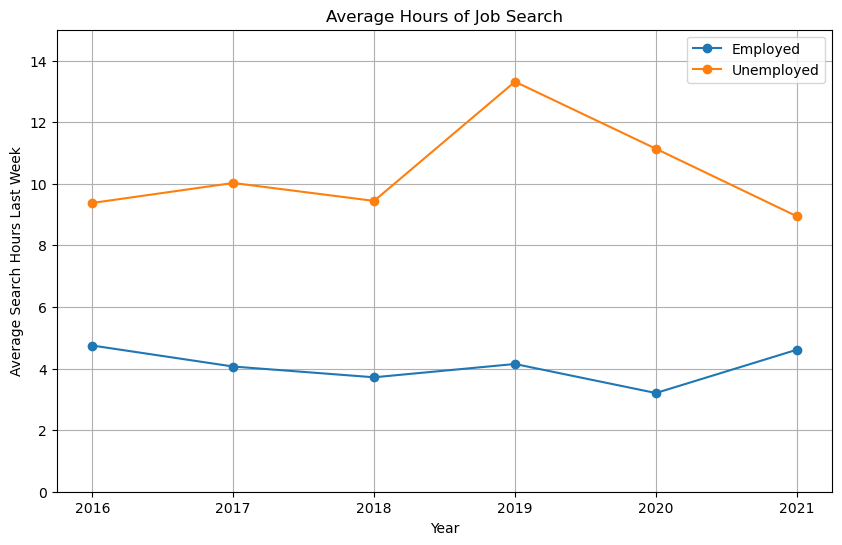

In [80]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['year'], agg_data['avg_search_hours_emp'], label='Employed', marker='o')

# Plot avg_search_hours_unemp
plt.plot(agg_data['year'], agg_data['avg_search_hours_unemp'], label='Unemployed', marker='o')

# Add titles and labels
plt.title('Average Hours of Job Search')
plt.xlabel('Year')
plt.ylabel('Average Search Hours Last Week')
plt.legend()
plt.ylim(0,15)
plt.grid()

# Show the plot
plt.show()

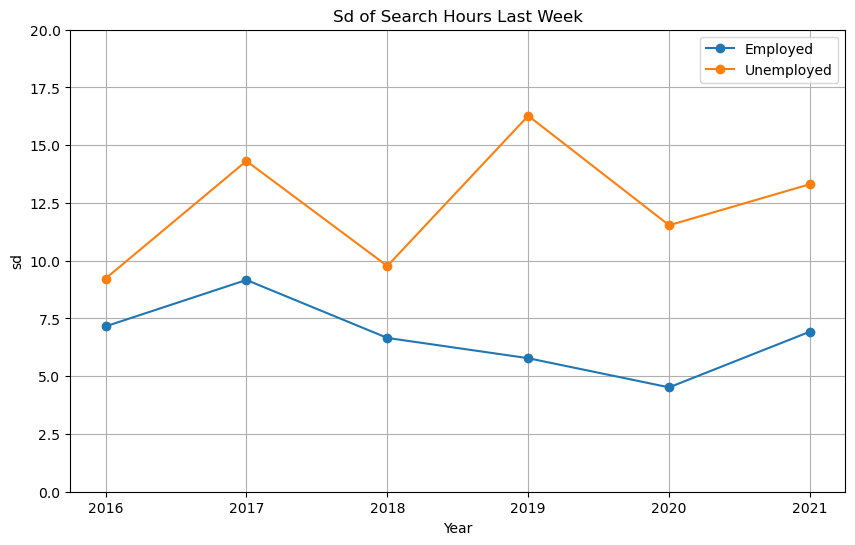

In [83]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['year'], agg_data['std_search_hours_emp'], label='Employed', marker='o')

# Plot avg_search_hours_unemp
plt.plot(agg_data['year'], agg_data['std_search_hours_unemp'], label='Unemployed', marker='o')

# Add titles and labels
plt.title('Sd of Search Hours Last Week')
plt.xlabel('Year')
plt.ylabel('sd')
plt.legend()
plt.ylim(0,20)
plt.grid()

# Show the plot
plt.show()

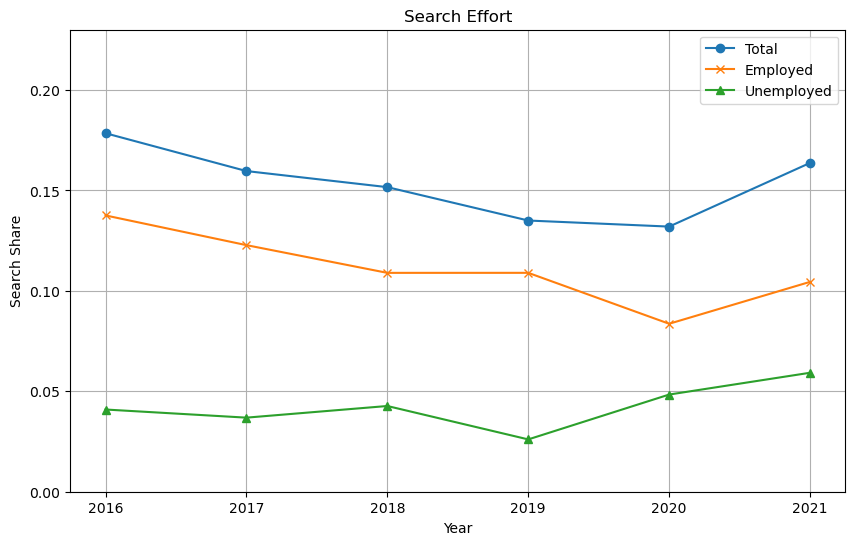

In [94]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['year'], agg_data['tot_search_share'], marker='o', label='Total')

# Plot employed search share
plt.plot(agg_data['year'], agg_data['emp_search_share'], marker='x', label='Employed')

# Plot unemployed search share (added marker for clarity)
plt.plot(agg_data['year'], agg_data['unemp_search_share'], marker='^', label='Unemployed')

# Add titles and labels
plt.title('Search Effort')
plt.xlabel('Year')
plt.ylabel('Search Share')
plt.ylim(0,.23)
plt.legend()
plt.grid()

# Show the plot
plt.show()

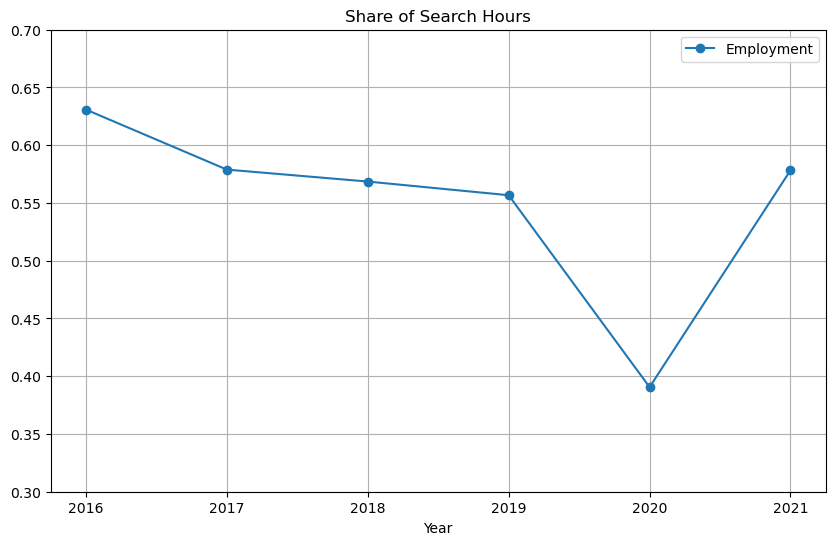

In [103]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['year'], agg_data['emp_share_search_hours'], marker='o', label='Employment')

# Add titles and labels
plt.title('Share of Search Hours')
plt.xlabel('Year')
plt.legend()
plt.ylim(.3,.7)
plt.grid()

# Show the plot
plt.show()

In [104]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,...,tot_search_share,emp_search_hours,unemp_search_hours,tot_search_hours,emp_share_search_hours,unemp_share_search_hours,avg_search_hours_emp,std_search_hours_emp,avg_search_hours_unemp,std_search_hours_unemp
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,...,0.163695,650.0,474.0,1124.0,0.578292,0.421708,4.609929,6.931062,8.943396,13.313404
1,70125586,2021,0.634458,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,...,0.163695,650.0,474.0,1124.0,0.578292,0.421708,4.609929,6.931062,8.943396,13.313404
2,75001148,2021,0.814109,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,...,0.163695,650.0,474.0,1124.0,0.578292,0.421708,4.609929,6.931062,8.943396,13.313404
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,...,0.163695,650.0,474.0,1124.0,0.578292,0.421708,4.609929,6.931062,8.943396,13.313404
4,70122015,2021,1.097391,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,...,0.163695,650.0,474.0,1124.0,0.578292,0.421708,4.609929,6.931062,8.943396,13.313404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,...,0.178473,769.0,450.0,1219.0,0.630845,0.369155,4.746914,7.156903,9.375000,9.226753
6649,70069256,2016,0.623000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,...,0.178473,769.0,450.0,1219.0,0.630845,0.369155,4.746914,7.156903,9.375000,9.226753
6650,70072511,2016,0.840000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,...,0.178473,769.0,450.0,1219.0,0.630845,0.369155,4.746914,7.156903,9.375000,9.226753
6651,70074226,2016,0.621000,1,NaN,NaN,NaN,767.910000,406.135000,1174.045000,...,0.178473,769.0,450.0,1219.0,0.630845,0.369155,4.746914,7.156903,9.375000,9.226753


In [215]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share,emp_search_hours,wgted_search_hours
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,729.572000,NaN
1,70125586,2021,0.634458,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,701.020009,NaN
2,75001148,2021,0.814109,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,492.530995,NaN
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,548.254677,NaN
4,70122015,2021,1.097391,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,258.263718,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,NaN,NaN
6649,70069256,2016,0.623000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,NaN,NaN
6650,70072511,2016,0.840000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,NaN,NaN
6651,70074226,2016,0.621000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,NaN,NaN


In [219]:
data['emp_search_hours'] = data.groupby('year')['wgted_search_hours'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().sum()
)

In [221]:
data['unemp_search_hours'] = data.groupby('year')['wgted_search_hours'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().sum()
)

In [222]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share,emp_search_hours,wgted_search_hours,unemp_search_hours
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,684.7769,NaN,576.748942
1,70125586,2021,0.634458,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,684.7769,NaN,576.748942
2,75001148,2021,0.814109,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,684.7769,NaN,576.748942
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,684.7769,NaN,576.748942
4,70122015,2021,1.097391,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,126.885266,71.930614,0.104471,0.059224,0.163695,684.7769,NaN,576.748942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,729.5720,NaN,488.827000
6649,70069256,2016,0.623000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,729.5720,NaN,488.827000
6650,70072511,2016,0.840000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,729.5720,NaN,488.827000
6651,70074226,2016,0.621000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,161.488000,48.047000,0.137548,0.040924,0.178473,729.5720,NaN,488.827000


In [117]:
data['tot_emp_search'] = data.groupby('year')['emp_search'].transform(lambda x: x[data['emp_search'] == 1].sum())

In [119]:
data['tot_unemp_search'] = data.groupby('year')['unemp_search'].transform(lambda x: x[data['unemp_search'] == 1].sum())

In [120]:
data

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L,tot_emp_search,tot_unemp_search
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631,141.0,53.0
1,70125586,2021,0.634458,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,141.0,53.0
2,75001148,2021,0.814109,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,141.0,53.0
3,75000602,2021,2.775664,0,NaN,NaN,NaN,791.659825,422.893805,1214.553631,141.0,53.0
4,70122015,2021,1.097391,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631,141.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,164.0,48.0
6649,70069256,2016,0.623000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,164.0,48.0
6650,70072511,2016,0.840000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,164.0,48.0
6651,70074226,2016,0.621000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000,164.0,48.0


In [107]:
data['emp_search'] = np.where(data['emp_search'].isin([1, 2]), 1, np.where(data['emp_search'] == 3, 0, np.nan))

In [96]:
data['unemp']

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search,E,U,L
0,75000155,2021,0.885758,1,NaN,NaN,NaN,791.659825,422.893805,1214.553631
1,70125586,2021,0.634458,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631
2,75001148,2021,0.814109,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631
3,75000602,2021,2.775664,0,0.0,NaN,NaN,791.659825,422.893805,1214.553631
4,70122015,2021,1.097391,1,NaN,0.0,NaN,791.659825,422.893805,1214.553631
...,...,...,...,...,...,...,...,...,...,...
6648,70066556,2016,0.440000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000
6649,70069256,2016,0.623000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000
6650,70072511,2016,0.840000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000
6651,70074226,2016,0.621000,1,NaN,0.0,NaN,767.910000,406.135000,1174.045000


In [47]:
data['emp_stat'] == 1

0        True
1        True
2        True
3       False
4        True
        ...  
6648     True
6649     True
6650     True
6651     True
6652     True
Name: emp_stat, Length: 6651, dtype: bool

In [49]:
emp_workers = data[data['emp_stat'] == 1]

In [52]:
emp_searchers = emp_workers[emp_workers['emp_search'] == 1]

In [53]:
emp_searchers

,userid,year,survey_weight,emp_stat,unemp_search,emp_search,hours_search
29,70123479,2021,0.781116,1,NaN,1.0,6.0
51,70122328,2021,0.450407,1,NaN,1.0,2.0
58,70121931,2021,0.717244,1,NaN,1.0,5.0
64,70124986,2021,0.356470,1,NaN,1.0,3.0
75,75000026,2021,0.844121,1,NaN,1.0,5.0
...,...,...,...,...,...,...,...
6567,70074172,2016,0.656000,1,NaN,1.0,10.0
6574,70072188,2016,0.440000,1,NaN,1.0,1.0
6592,70068186,2016,0.518000,1,NaN,1.0,2.0
6621,70072853,2016,3.553000,1,NaN,1.0,0.0
